### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv('data/winequality-red.csv', sep = ',')

In [76]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
X = df.drop('quality', axis = 1)
y = df['quality']

<Axes: >

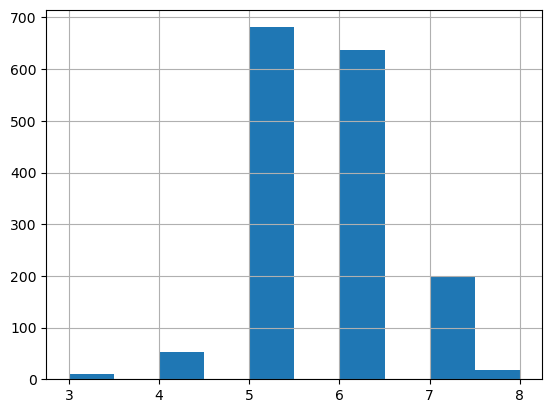

In [80]:
y.hist()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [121]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

### Baseline: Using a single feature
The ChatGPT 4.0 LLM guesses that the Alchohol Content is the single most important factor in the quality of a wine. We will try that first to set a baseline.

In [177]:
X = df[['alcohol']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_predictions = linreg.predict(X_train)
test_predictions = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(linreg.coef_)

print(train_mse)
print(test_mse)

[0.3742707]
0.5055199463931866
0.5004405691775314


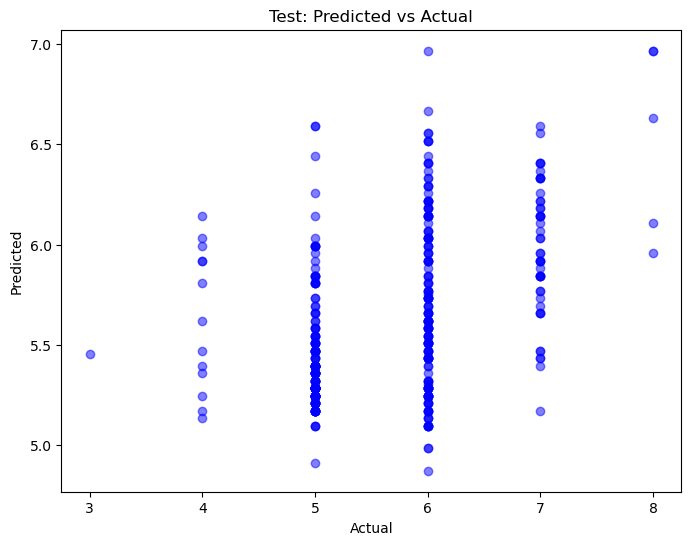

In [89]:
# Plotting the training data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test: Predicted vs Actual')
plt.show()

### Polynomial Regression
Using Polynomial Regression and all Features

In [111]:
X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

mses = []

for i in range(1,4):
    pipe = Pipeline([
        ('poly_features', PolynomialFeatures(degree=i)),
        ('linreg', LinearRegression())
    ])

    pipe.fit(X_train, y_train)
    
    train_predictions = pipe.predict(X_train)
    test_predictions = pipe.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    mses.append({
        'Degree': i,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
    })

print(mses)


[{'Degree': 1, 'Train MSE': 0.42741864865173085, 'Test MSE': 0.388301738686892}, {'Degree': 2, 'Train MSE': 0.3717640979909046, 'Test MSE': 0.3869587438606288}, {'Degree': 3, 'Train MSE': 0.23056146168050948, 'Test MSE': 0.8494384996187935}]


In [113]:
pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)

train_predictions = pipe.predict(X_train)
test_predictions = pipe.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(train_mse)
print(test_mse)

0.42741864865173074
0.3883017386868924


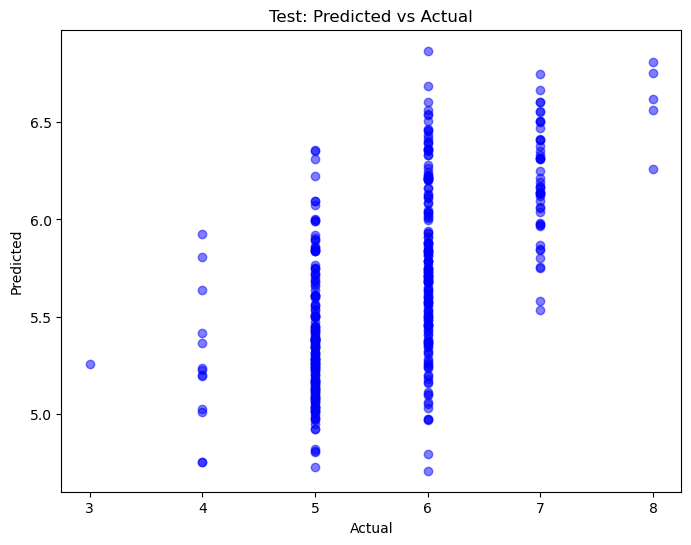

In [115]:
# Plotting the training data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test: Predicted vs Actual')
plt.show()

In [117]:
# After fitting the pipeline, extract the linear regression model
linreg_model = pipe.named_steps['linreg']

# Get the feature names from the PolynomialFeatures step
feature_names = pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)

# Get the coefficients from the linear regression model
coefficients = linreg_model.coef_

# Create a DataFrame to display the features and their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
coefficients_df

,Feature,Coefficient
9,sulphates,0.819819
10,alcohol,0.286228
0,fixed acidity,0.021860
3,residual sugar,0.008859
5,free sulfur dioxide,0.005009
6,total sulfur dioxide,-0.003654
2,citric acid,-0.133904
8,pH,-0.343940
1,volatile acidity,-1.008695
4,chlorides,-1.755578


### Ridge Regression

In [148]:
# Separate the features (X) and the target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# alphas = np.linspace(0, 25, 50)
alphas = np.logspace(-4, 4, 50)

mses = []
min_mse = {
            'Alpha': 1,
            'Train MSE': np.inf,
            'Test MSE': np.inf,
        }

for alpha in alphas:
    # Initialize and train the Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Make predictions on the training and testing sets
    train_predictions = ridge_model.predict(X_train)
    test_predictions = ridge_model.predict(X_test)
    
    # Evaluate the model
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    mse = {
        'Alpha': alpha,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Model': ridge_model
    }

    mses.append(mse)

    if(test_mse < min_mse['Test MSE']):
        min_mse = mse

print(min_mse)

{'Alpha': 0.0001, 'Train MSE': 0.42078876225822504, 'Test MSE': 0.4112618243709591, 'Model': Ridge(alpha=0.0001)}


In [154]:
# Retrieve the coefficients from the linear model within the pipeline
coefficients = min_mse['Model'].coef_

# Get the feature names from the selector (e.g., RFE or any feature selector in your pipeline)
feature_names = X_train.columns

# Create a DataFrame with feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the DataFrame
coef_df

,Feature,Coefficient
0,fixed acidity,0.021706
1,volatile acidity,-1.100828
2,citric acid,-0.248063
3,residual sugar,0.006915
4,chlorides,-1.676101
5,free sulfur dioxide,0.004570
6,total sulfur dioxide,-0.003268
7,density,-12.319699
8,pH,-0.328830
9,sulphates,0.810204


### Sequential Feature Selection

In [157]:
# Assuming df is your DataFrame
X = df.drop(columns=['quality'])
y = df['quality']

# Split the data (not necessary for feature selection but often useful)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Lasso model
lasso = Lasso()

# Define the Sequential Feature Selector
sfs = SequentialFeatureSelector(lasso, n_features_to_select=4, direction='forward')

# Fit the model
sfs.fit(X_train, y_train)

# Get the selected feature names
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'total sulfur dioxide'],
      dtype='object')


### Recursive Feature Elimination

In [159]:
# Assuming df is your DataFrame
X = df.drop(columns=['quality'])
y = df['quality']

# Split the data (not necessary for feature selection but often useful)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Lasso model
lasso = Lasso()

# Define the RFE selector
rfe = RFE(estimator=lasso, n_features_to_select=4)

# Fit the model
rfe.fit(X_train, y_train)

# Get the selected feature names
selected_features = X.columns[rfe.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], dtype='object')


### Ridge Regression
On Features selected from Sequential Feature Selection

In [166]:
# Separate the features (X) and the target variable (y)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide']]
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# alphas = np.linspace(0, 25, 50)
alphas = np.logspace(-4, 4, 50)

mses = []
min_mse = {'Test MSE': np.inf}

for alpha in alphas:
    # Initialize and train the Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Make predictions on the training and testing sets
    train_predictions = ridge_model.predict(X_train)
    test_predictions = ridge_model.predict(X_test)
    
    # Evaluate the model
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    mse = {
        'Alpha': alpha,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Model': ridge_model,
        'Train Preds': train_predictions,
        'Test Preds': test_predictions
    }

    mses.append(mse)

    if(test_mse < min_mse['Test MSE']):
        min_mse = mse

print(min_mse['Alpha'], min_mse['Train MSE'], min_mse['Test MSE'])

0.8286427728546842 0.5415717361985628 0.5255520983588247


In [168]:
# Retrieve the coefficients from the linear model within the pipeline
coefficients = min_mse['Model'].coef_

# Get the feature names from the selector (e.g., RFE or any feature selector in your pipeline)
feature_names = X_train.columns

# Create a DataFrame with feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the DataFrame
coef_df

,Feature,Coefficient
0,fixed acidity,-0.011039
1,volatile acidity,-1.581864
2,citric acid,0.105537
3,total sulfur dioxide,-0.004416


### Ridge Regression
On Features selected from Recursive Feature Elimination

In [172]:
# Separate the features (X) and the target variable (y)
X = df[['total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# alphas = np.linspace(0, 25, 50)
alphas = np.logspace(-4, 4, 50)

mses = []
min_mse = {'Test MSE': np.inf}

for alpha in alphas:
    # Initialize and train the Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Make predictions on the training and testing sets
    train_predictions = ridge_model.predict(X_train)
    test_predictions = ridge_model.predict(X_test)
    
    # Evaluate the model
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    mse = {
        'Alpha': alpha,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Model': ridge_model,
        'Train Preds': train_predictions,
        'Test Preds': test_predictions
    }

    mses.append(mse)

    if(test_mse < min_mse['Test MSE']):
        min_mse = mse

print(min_mse['Alpha'], min_mse['Train MSE'], min_mse['Test MSE'])

0.0001 0.46369779290148083 0.4548992600483632


In [174]:
# Retrieve the coefficients from the linear model within the pipeline
coefficients = min_mse['Model'].coef_

# Get the feature names from the selector (e.g., RFE or any feature selector in your pipeline)
feature_names = X_train.columns

# Create a DataFrame with feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the DataFrame
coef_df

,Feature,Coefficient
0,total sulfur dioxide,-0.002625
1,pH,-0.491468
2,sulphates,0.829777
3,alcohol,0.356974
